In [1]:
import pandas as pd

## Pandas / Python References <br>
String Methods: https://www.w3schools.com/python/python_ref_string.asp <br>
DataFrame Reference: https://www.w3schools.com/python/pandas/pandas_ref_dataframe.asp <br>


In [6]:
# ORIGINAL DATAFRAME 
# df = pd.read_csv(r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\messy_crm_dataset.csv', nrows = 10)

df= pd.read_csv(r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\DataScientist2.csv')
df_copy = df.copy()
print(df_copy.info())
print("DF SHAPE: ", df_copy.shape)

df_copy.columns.str.lower()
df_copy.columns.str.replace(r'[^a-z0-9]+', '_', regex=True)
df_copy.columns.str.strip()


#Create FILE TO BE CLEANSED
# Call load_file function 
# file_toBe_cleansed = (r'C:\Users\Cessn\OneDrive\Desktop\sample_datasets\data_scientist\csv_files\messy_crm_dataset.csv', nrows = 10)
# print(file_toBe_cleansed.shape, "\n", file_toBe_cleansed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3912 non-null   int64  
 1   index              3912 non-null   int64  
 2   Job Title          3911 non-null   object 
 3   Salary Estimate    3912 non-null   object 
 4   Job Description    3911 non-null   object 
 5   Rating             3912 non-null   float64
 6   Company Name       3912 non-null   object 
 7   Location           3912 non-null   object 
 8   Headquarters       3911 non-null   object 
 9   Size               3912 non-null   object 
 10  Founded            3912 non-null   int64  
 11  Type of ownership  3911 non-null   object 
 12  Industry           3910 non-null   object 
 13  Sector             3912 non-null   object 
 14  Revenue            3912 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3912 

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

# 8 Most Common Data Cleansing Techniques:

## 1. Dropping Columns: 
cols_to_drop = [""] > df_copy.drop(to_drop, axis = 1)
NOTE: 
axis = 0 (rows) 
axis = 1 (columns)

In [11]:
# Drop irrelevant columns
cols_to_drop = ["Unnamed: 0", "Headquarters", "Founded", "Type of ownership", "Competitors"]

df_copy = df_copy.drop(cols_to_drop, axis = 1) 



KeyError: "['Unnamed: 0', 'Headquarters', 'Founded', 'Type of ownership', 'Competitors'] not found in axis"

In [12]:
df_copy.to_csv('output.csv')

## 2. Removing Duplicates
## Info - https://www.w3schools.com/python/pandas/ref_df_duplicated.asp

Syntax Example:
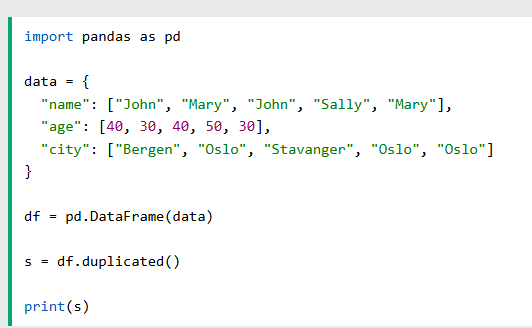

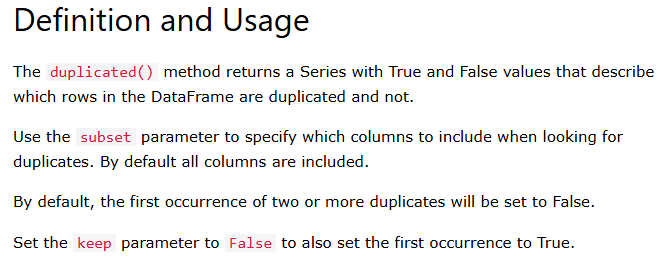

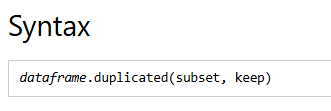

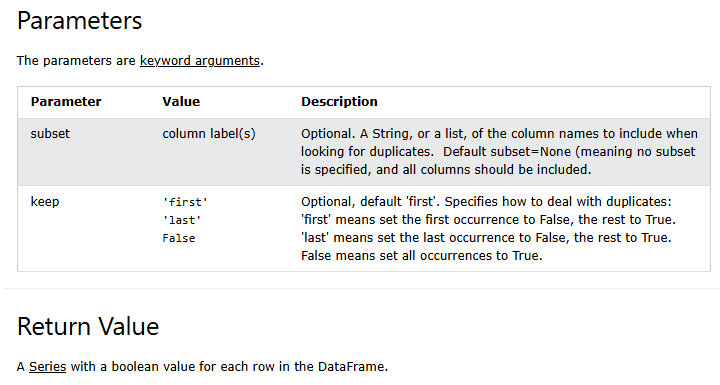

Syntax:  <br>
get duplicates returned in DataFrame Format: df_copy[df_copy.duplicated()] <br>
get duplicates returned in Text Format: df_copy.duplicated() <br>


# 3. Removing Irrelevant Rows

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Easy Apply
3909,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH",5001 to 10000 employees,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1
3910,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH",1 to 50 employees,Accounting,Accounting & Legal,Less than $1 million (USD),-1
3911,4379,Patient Safety Physician or Safety Scientist -...,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB\n3.7,"Slough, OH",5001 to 10000 employees,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),-1


In [24]:
# CHeck for Jobs located in State of Ohio in DataFrame:
df_copy['Location'].str.contains("Oh", case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3907     True
3908     True
3909     True
3910     True
3911     True
Name: Location, Length: 3912, dtype: bool

## 4. Removing Nulls and Blanks
# Get count of na (Not a Number values) - df_copy.isna().sum

# Get count of null (null values) - df_copy.isnull().sum
# Get count of null / na values fpr specific column - df["column name"].isna() / df['column name'].isnull()
# For multiple columns pass a list of column names in - df.[["list_of_column_names"]].isna()

In [35]:
df_copy.isnull()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Easy Apply
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3907,False,False,False,False,False,False,False,False,False,False,False,False
3908,False,False,False,False,False,False,False,False,False,False,False,False
3909,False,False,False,False,False,False,False,False,False,False,False,False
3910,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df_copy.isnull().sum()

index              0
Job Title          1
Salary Estimate    0
Job Description    1
Rating             0
Company Name       0
Location           0
Size               0
Industry           2
Sector             0
Revenue            0
Easy Apply         0
dtype: int64

In [40]:
df_copy.dropna(inplace=True, subset=["Job Title", "Job Description", "Industry"])
df_copy.isnull().sum()

index              0
Job Title          0
Salary Estimate    0
Job Description    0
Rating             0
Company Name       0
Location           0
Size               0
Industry           0
Sector             0
Revenue            0
Easy Apply         0
dtype: int64

In [41]:
df_copy.to_csv('output.csv')